## Retrieve House Dataset


[house price dataset from Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

To retrieve the dataset lets use **wget** which is a It is a popular tool for downloading files and does not require any additional libraries to be loaded or installed. Recall we used this file in our data wrangling course so lets get the raw file from the github repository.

In [5]:
import pandas as pd

# Reanme the retrieved file using -O parameter
!wget -O house_price_dataset.csv  https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv

# Load the dataset
house_df = pd.read_csv('house_price_dataset.csv')

house_df.columns


--2025-04-29 14:37:42--  https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘house_price_dataset.csv’

house_price_dataset 100%[===================>] 449.88K  --.-KB/s    in 0.009s  

2025-04-29 14:37:42 (51.2 MB/s) - ‘house_price_dataset.csv’ saved [460676/460676]



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FstFlrSF', 'SndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Prompt

## Kaggle House Prices: Data Analysis and Model Building Workflow

As a data science agent create the following code. Write all the code and comment accordinlyl. Analyze the Kaggle House Prices dataset in the dataframe house_df. Please perform the following steps comprehensively, explaining the code with comment, and write the  Python code using libraries like Pandas, Scikit-learn, Matplotlib, Seaborn, XGBoost, or LightGBM:

1.  **Load Data:**

    * **Start with the existing `house_df` DataFrame.**
    * Split house_df into a training and test set.
    * Load `train.csv` and `test.csv` into pandas DataFrames.
    * Display the first few rows and basic info (`.info()`, `.describe()`) for both datasets.

2.  **Exploratory Data Analysis (EDA):**
    * Analyze the target variable `SalePrice`: Check its distribution, skewness, and apply a log transformation (`log1p`) to normalize it, as this aligns with the competition's evaluation metric (RMSLE). *Visualize the original and transformed distributions.*
    * Analyze Missing Values: Identify features with missing values in both training and test sets. Quantify the percentage missing for each. Visualize the missing data patterns if helpful (e.g., using `missingno` library).
    * Analyze Feature Types:  Explicitly separate features into numerical and categorical groups. For any correlation analysis or visualization that involves numerical calculations, ensure you are only using the numerical features.
    * Visualize Key Features: Create plots (scatter plots, box plots) to understand the relationship between top correlating numerical features (e.g., OverallQual, GrLivArea, GarageCars, TotalBsmtSF) and the log-transformed SalePrice.
    * Also, visualize relationships for key categorical features using appropriate visualization techniques for categorical data (e.g., bar plots, count plots).
    * Correlation Analysis: Examine correlations between numerical features and the (log-transformed) `SalePrice`. Visualize the highest correlations (e.g., heatmap).
    * Visualize Key Features: Create plots (scatter plots, box plots) to understand the relationship between top correlating features (e.g., `OverallQual`, `GrLivArea`, `GarageCars`, `TotalBsmtSF`) and the log-transformed `SalePrice`. Also, visualize relationships for key categorical features.
    * Outlier Detection: Briefly investigate potential outliers, especially in key features like `GrLivArea`, and discuss potential handling strategies (though be cautious about removing too much data).

3.  **Data Preprocessing & Feature Engineering:**
    * Combine Training and Test Data: Temporarily combine `train.csv` (without `SalePrice`) and `test.csv` for consistent preprocessing (remember the number of training rows to split them later). Keep the `Id` columns separate.
    * Handle Missing Values: Implement imputation strategies. Use appropriate methods based on feature type and meaning (e.g., 'None' for categorical representing absence, mode for other categoricals, median/mean or model-based imputation for numerical). *Explain your choices.*
    * Feature Transformation: Apply necessary transformations identified during EDA (like log transform for skewed numerical features if needed, beyond the target variable).
    * Categorical Encoding: Convert categorical features into numerical representations suitable for machine learning models (e.g., One-Hot Encoding for nominal features with low cardinality, potentially Label Encoding or Target Encoding for others, explaining the choice).
    * Feature Engineering (Optional but Recommended): Create new potentially useful features. Examples: `TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF`, `TotalBath = FullBath + 0.5*HalfBath + BsmtFullBath + 0.5*BsmtHalfBath`, `Age = YrSold - YearBuilt`.
    * Numerical Feature Scaling: Apply scaling (e.g., `StandardScaler` or `RobustScaler`) to numerical features ***after*** splitting the data back into training and testing sets to prevent data leakage from the test set.
    * Split Data: Separate the combined data back into processed training (`X`) and testing (`X_test`) sets. Assign the log-transformed `SalePrice` to the target variable (`y`).

4.  **Model Selection and Training:**
    * Choose Models: Select a few robust regression models suitable for this task (e.g., `Ridge`, `Lasso`, `ElasticNet`, `RandomForestRegressor`, `GradientBoostingRegressor`, `XGBoost`, `LightGBM`).
    * Cross-Validation Setup: Define a cross-validation strategy (e.g., `KFold` with shuffling). Use Root Mean Squared Log Error (RMSLE) as the scoring metric (this means models should predict the log-transformed price, and you'll take the RMSE of those predictions, or predict the original scale and calculate RMSLE directly). *Note: Since we log-transformed `y`, using standard RMSE on the transformed target during cross-validation is equivalent to RMSLE on the original scale.*
    * Baseline Model Training: Train the selected models using cross-validation on the processed training data (`X`, `y`) with default parameters. Report the average cross-validation RMSE scores for each.

5.  **Hyperparameter Tuning:**
    * Select Promising Models: Choose the top 2-3 models based on baseline cross-validation performance.
    * Tune Hyperparameters: Use techniques like `GridSearchCV` or `RandomizedSearchCV` to find optimal hyperparameters for the selected models, optimizing for the RMSE score (on the log-transformed target).

6.  **Model Evaluation and Final Selection:**
    * Evaluate Tuned Models: Report the best cross-validation RMSE scores for the tuned models.
    * Final Model Choice: Select the single best-performing model based on the tuned CV scores. Briefly justify the choice. Consider potentially blending/stacking models if aiming for top performance (though this adds complexity).

7.  **Prediction on Test Set:**
    * Train Final Model: Train the selected, tuned model on the *entire* processed training dataset (`X`, `y`).
    * Generate Predictions: Make predictions on the processed test dataset (`X_test`). Remember that the model predicts the ***log-transformed*** price, so apply the inverse transformation (`expm1`) to get the predictions back to the original scale.
    * Create Submission File: Generate a CSV file with two columns: `Id` (from the original test set) and `SalePrice` (the final, inverse-transformed predictions). Ensure it matches the format required by the Kaggle competition.

8.  **Conclusion:**
    * Summarize the final model, its expected performance (cross-validation score), and any key findings or challenges encountered.



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load Data:

# Start with the existing house_df DataFrame.
# Assuming house_df is already loaded (from the previous code)

# Split house_df into a training and test set.
train_df, test_df = train_test_split(house_df, test_size=0.2, random_state=42)

# Display the first few rows and basic info for both datasets.
print("Training Data:")
display(train_df.head())
train_df.info()
display(train_df.describe())

print("\nTest Data:")
display(test_df.head())
test_df.info()
display(test_df.describe())

Training Data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    951 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          74 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallCond

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,TSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,951.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,730.904966,56.849315,70.343849,10689.642123,6.121575,5.584760,1970.965753,1984.897260,103.771945,446.023973,...,95.946918,49.578767,21.839041,3.812500,15.407534,2.955479,51.267123,6.356164,2007.818493,181441.541952
std,425.369088,42.531862,24.897021,10759.366198,1.367619,1.116062,30.675495,20.733955,173.032238,459.070977,...,129.685939,69.433580,62.083227,31.519664,55.881148,41.648504,553.039684,2.670707,1.322639,77263.583862
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.750000,20.000000,59.000000,7587.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,732.500000,50.000000,70.000000,9600.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,384.500000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,1101.750000,70.000000,80.000000,11700.000000,7.000000,6.000000,2001.000000,2004.000000,166.000000,721.000000,...,168.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214925.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,745000.000000



Test Data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
413,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500


<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    250 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          17 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCond  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,TSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,292.000000,292.000000,250.000000,292.000000,292.000000,292.000000,292.000000,292.000000,290.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,728.880137,57.089041,68.932000,9825.571918,6.010274,5.537671,1972.476027,1984.739726,103.337931,434.102740,...,87.434932,34.986301,22.414384,1.797945,13.674658,1.972603,12.376712,6.184932,2007.804795,178839.811644
std,406.932776,41.433741,21.809309,5886.343498,1.441850,1.100743,28.251377,20.321997,210.539173,444.652028,...,106.111686,50.049184,57.199562,17.941206,55.333233,33.707850,79.339770,2.832078,1.351941,87730.751259
min,16.000000,20.000000,21.000000,1491.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,374.250000,20.000000,59.000000,7315.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,127000.000000
50%,720.000000,50.000000,66.500000,9008.500000,6.000000,5.000000,1975.000000,1992.000000,0.000000,374.000000,...,26.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,154150.000000
75%,1066.250000,70.000000,80.000000,11256.250000,7.000000,6.000000,1999.000000,2003.250000,147.250000,685.250000,...,168.000000,53.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,209175.000000
max,1451.000000,190.000000,174.000000,70761.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,2188.000000,...,466.000000,274.000000,318.000000,238.000000,396.000000,576.000000,600.000000,12.000000,2010.000000,755000.000000


SalePrice Distribution Analysis:
count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64
Skewness: 1.743128561420854


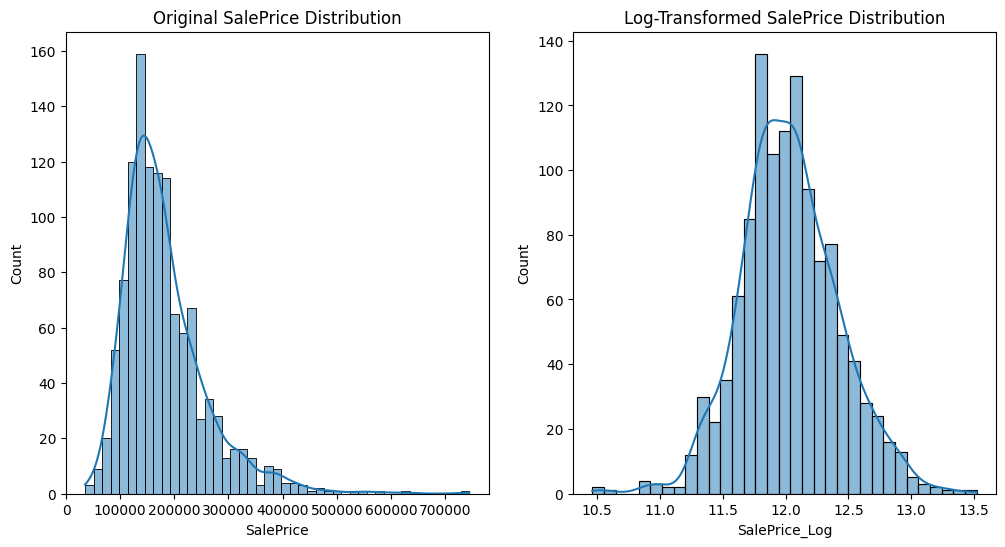


Missing Data Analysis:
              Missing Values  Percentage
PoolQC                  1162   99.486301
MiscFeature             1122   96.061644
Alley                   1094   93.664384
Fence                    935   80.051370
MasVnrType               683   58.476027
FireplaceQu              547   46.832192
LotFrontage              217   18.578767
GarageType                64    5.479452
GarageYrBlt               64    5.479452
GarageFinish              64    5.479452
GarageQual                64    5.479452
GarageCond                64    5.479452
BsmtCond                  28    2.397260
BsmtFinType1              28    2.397260
BsmtExposure              28    2.397260
BsmtQual                  28    2.397260
BsmtFinType2              28    2.397260
MasVnrArea                 6    0.513699
Electrical                 1    0.085616


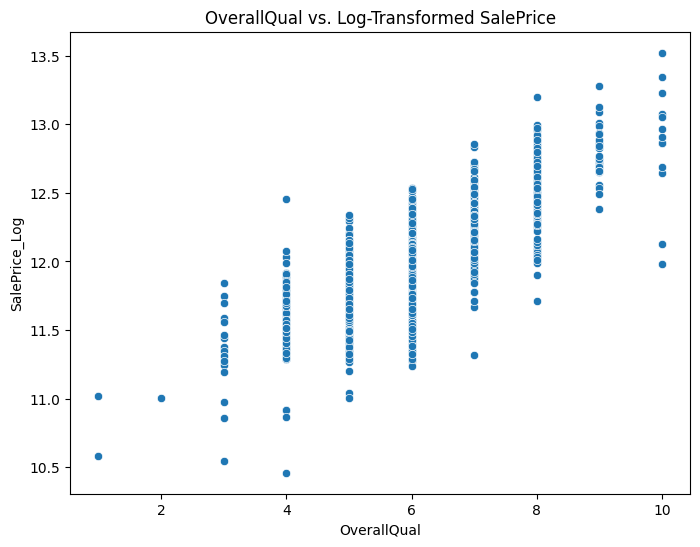

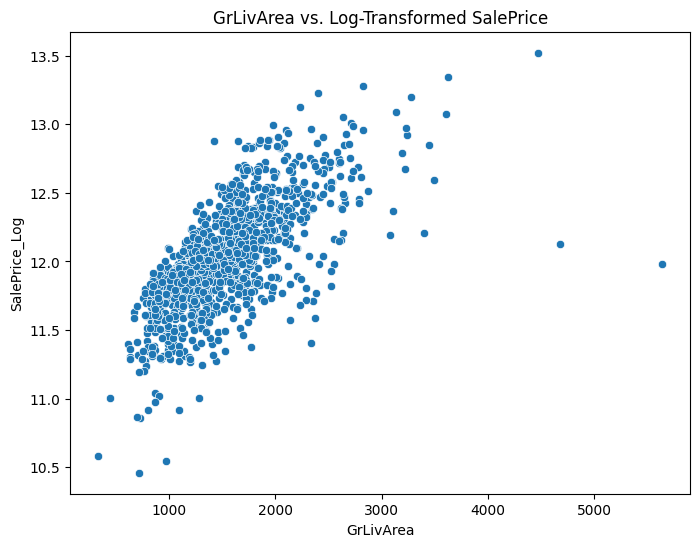

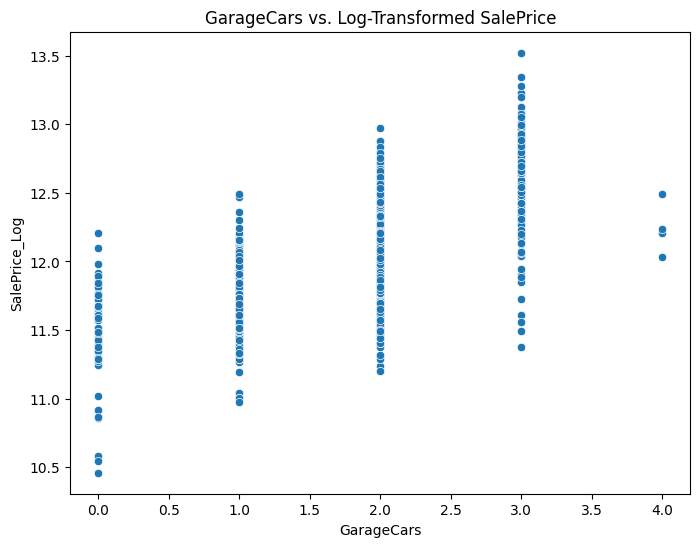

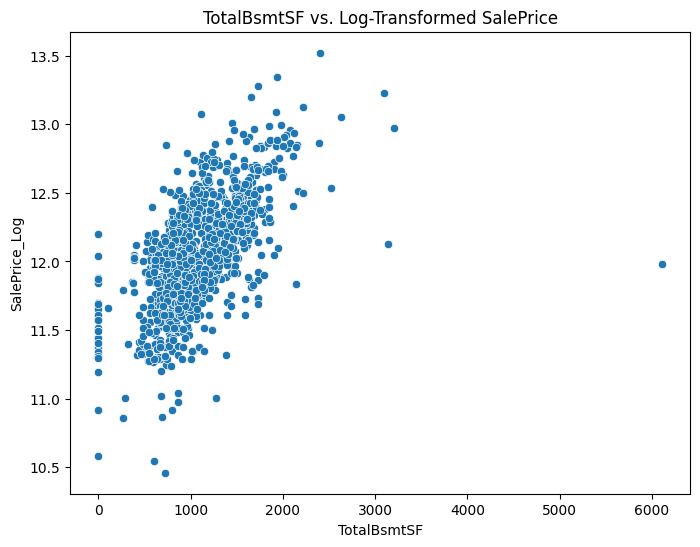

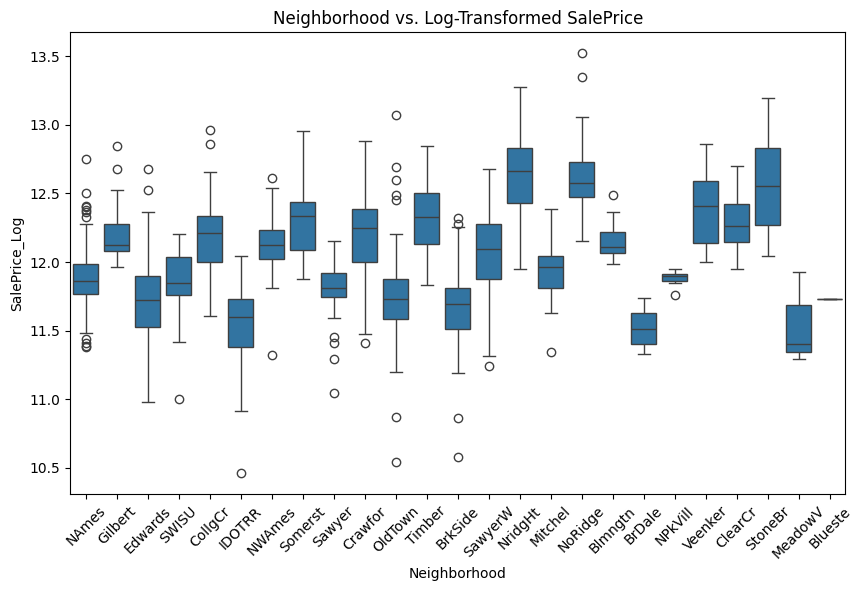

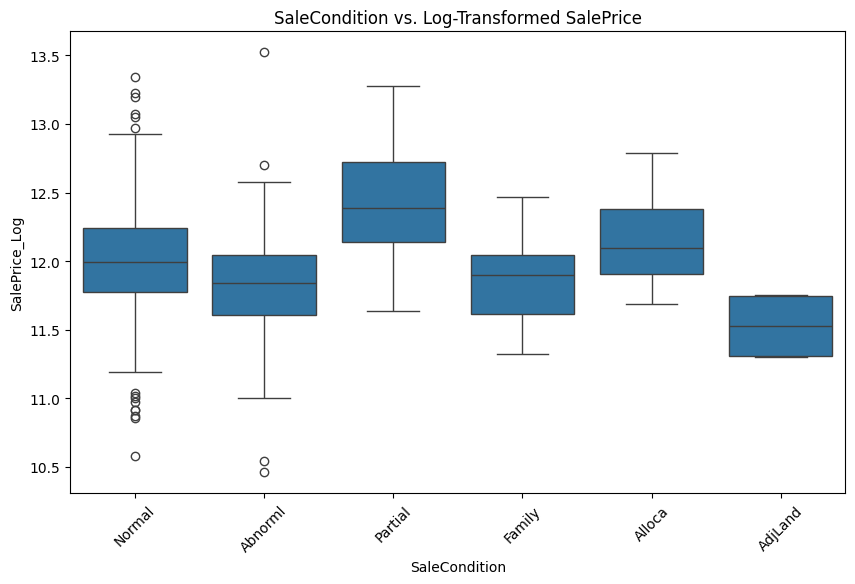

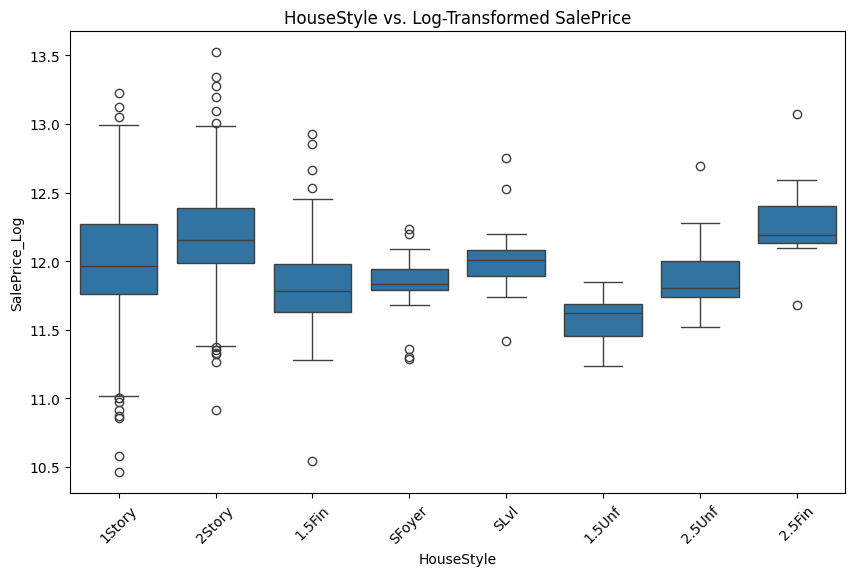


Correlation with SalePrice:
SalePrice        1.000000
SalePrice_Log    0.952971
OverallQual      0.785555
GrLivArea        0.695652
GarageCars       0.640991
GarageArea       0.624139
TotalBsmtSF      0.597766
FstFlrSF         0.587883
FullBath         0.552546
TotRmsAbvGrd     0.520388
YearBuilt        0.516501
YearRemodAdd     0.508593
GarageYrBlt      0.480351
MasVnrArea       0.459123
Fireplaces       0.457549
BsmtFinSF1       0.359460
LotFrontage      0.330066
WoodDeckSF       0.329843
SndFlrSF         0.314030
OpenPorchSF      0.299969
HalfBath         0.280481
LotArea          0.266204
BsmtFullBath     0.226346
BsmtUnfSF        0.222487
BedroomAbvGr     0.156211
ScreenPorch      0.119172
PoolArea         0.115630
TSsnPorch        0.051532
MoSold           0.041890
BsmtFinSF2      -0.005731
YrSold          -0.009099
LowQualFinSF    -0.011189
Id              -0.019643
MiscVal         -0.020179
BsmtHalfBath    -0.048346
OverallCond     -0.074391
MSSubClass      -0.088081
KitchenAb

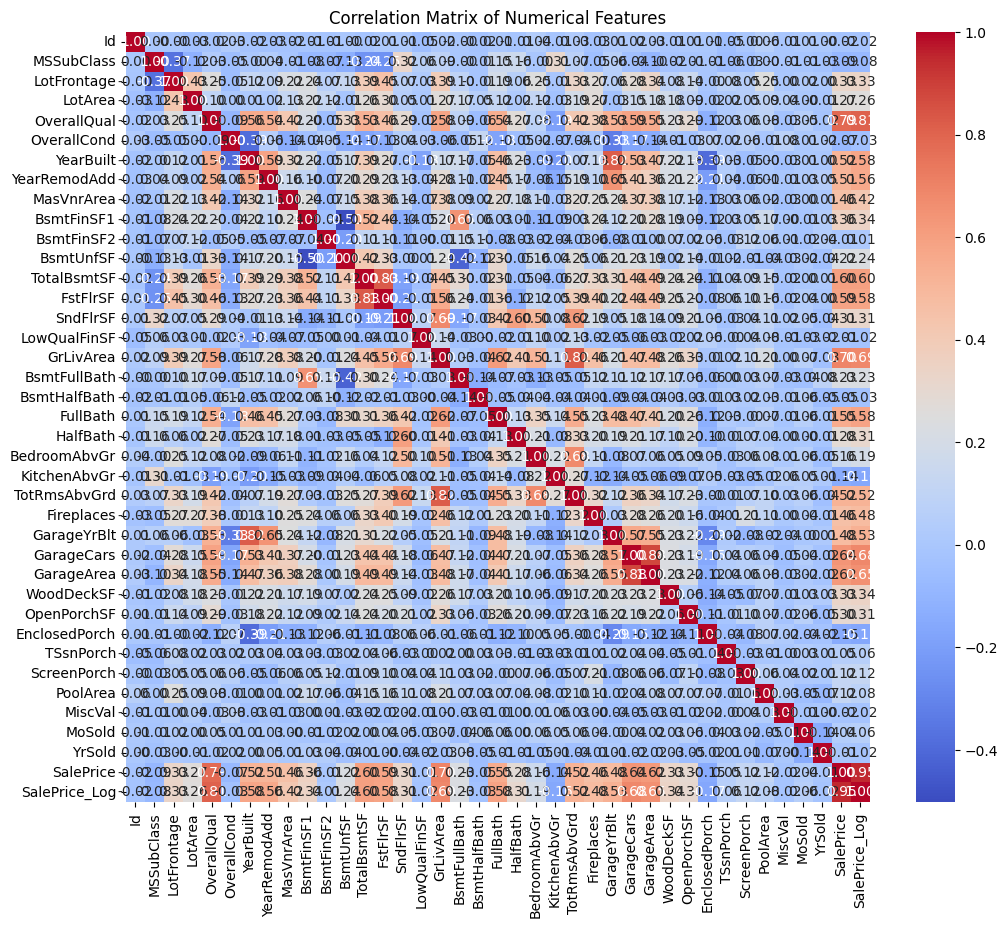

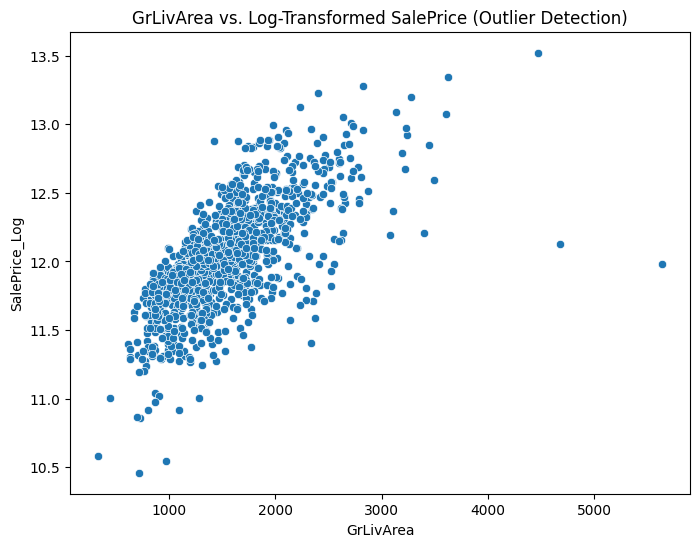

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Exploratory Data Analysis (EDA):

# Analyze the target variable SalePrice:
print("SalePrice Distribution Analysis:")
print(train_df['SalePrice'].describe())
print("Skewness:", train_df['SalePrice'].skew())

# Apply log transformation (log1p) to normalize SalePrice
train_df['SalePrice_Log'] = np.log1p(train_df['SalePrice'])

# Visualize original and transformed distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("Original SalePrice Distribution")

plt.subplot(1, 2, 2)
sns.histplot(train_df['SalePrice_Log'], kde=True)
plt.title("Log-Transformed SalePrice Distribution")
plt.show()

# Analyze Missing Values:
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print("\nMissing Data Analysis:")
print(missing_data)

# Analyze Feature Types:
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_df.select_dtypes(exclude=[np.number]).columns.tolist()

# Visualize Key Features:
# Scatter plots for numerical features vs. SalePrice_Log
for feature in ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='SalePrice_Log', data=train_df)
    plt.title(f"{feature} vs. Log-Transformed SalePrice")
    plt.show()

# Box plots for categorical features vs. SalePrice_Log
for feature in ['Neighborhood', 'SaleCondition', 'HouseStyle']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='SalePrice_Log', data=train_df)
    plt.title(f"{feature} vs. Log-Transformed SalePrice")
    plt.xticks(rotation=45)
    plt.show()

# Correlation Analysis:
correlation_matrix = train_df[numerical_features].corr()
sale_price_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("\nCorrelation with SalePrice:")
print(sale_price_corr)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Outlier Detection:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice_Log', data=train_df)
plt.title("GrLivArea vs. Log-Transformed SalePrice (Outlier Detection)")
plt.show()

# Potential outlier handling strategies (discuss in comments)
# ...

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np

# 3. Data Preprocessing & Feature Engineering:

# Combine Training and Test Data:
train_len = len(train_df)  # Store the number of training rows
combined_data = pd.concat([train_df.drop(['SalePrice', 'SalePrice_Log'], axis=1), test_df], axis=0) # Drop SalePrice_Log as well
combined_data_id = combined_data['Id']  # Keep Id separate
combined_data = combined_data.drop('Id', axis=1)

# Handle Missing Values:
# Imputation strategies based on feature type and meaning
categorical_features_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                            'BsmtFinType2', 'MasVnrType']
categorical_features_mode = [col for col in categorical_features if col not in categorical_features_none]
numerical_features_median = ['LotFrontage']
# Exclude 'Id' and 'SalePrice' from numerical_features_mean
numerical_features_mean = [col for col in numerical_features if col not in numerical_features_median and col != 'SalePrice' and col != 'Id' and col != 'SalePrice_Log']

# Apply imputation
for col in categorical_features_none:
    combined_data[col] = combined_data[col].fillna('None')
for col in categorical_features_mode:
    combined_data[col] = combined_data[col].fillna(combined_data[col].mode()[0])
for col in numerical_features_median:
    combined_data[col] = combined_data[col].fillna(combined_data[col].median())
for col in numerical_features_mean:
    combined_data[col] = combined_data[col].fillna(combined_data[col].mean())

# Feature Transformation:
# Apply log transformation to skewed numerical features if needed (beyond SalePrice)
# Example:
# combined_data['GrLivArea_Log'] = np.log1p(combined_data['GrLivArea'])

# Categorical Encoding:
# One-Hot Encoding for nominal features with low cardinality
categorical_features_ohe = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                            'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                            'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                            'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                            'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                            'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                            'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                            'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
                            'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_mean + numerical_features_median),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features_ohe),
    ])

# Fit and transform the data
processed_data = preprocessor.fit_transform(combined_data)

# Feature Engineering:
# Create new features (after preprocessing to avoid issues with column names)

# Get feature names after OneHotEncoding
feature_names = numerical_features_mean + numerical_features_median + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features_ohe))

# Convert processed_data back to DataFrame for feature engineering
processed_df = pd.DataFrame(processed_data, columns=feature_names, index=combined_data.index)

# Now you can create new features:
# processed_df['TotalSF'] = processed_df['TotalBsmtSF'] + processed_df['1stFlrSF'] + processed_df['2ndFlrSF']
# processed_df['TotalBath'] = processed_df['FullBath'] + 0.5*processed_df['HalfBath'] + processed_df['BsmtFullBath'] + 0.5*processed_df['BsmtHalfBath']
# processed_df['Age'] = processed_df['YrSold'] - processed_df['YearBuilt']


# Split Data:
X = processed_df.iloc[:train_len]  # Use iloc for index-based slicing
X_test = processed_df.iloc[train_len:]
y = train_df['SalePrice_Log']  # Log-transformed SalePrice

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# ... (Previous code for data loading, preprocessing, and feature engineering) ...


# 4. Model Selection and Training:

# Choose Models:
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
}

# Cross-Validation Setup:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Baseline Model Training and Evaluation:
results = {}
for model_name, model in models.items():
    rmse_scores = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))  # RMSE on log-transformed target
        rmse_scores.append(rmse)

    results[model_name] = np.mean(rmse_scores)

# Report Results:
print("Baseline Model Performance (RMSE on Log-Transformed Target):")
for model_name, rmse in results.items():
    print(f"{model_name}: {rmse:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3037
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 178
[LightGBM] [Info] Start training from score 12.030005
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3059
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 180
[LightGBM] [Info] Start training from score 12.034848
[LightGBM] [Warning] Found w

In [18]:
# 5. Hyperparameter Tuning:

# Select Promising Models:
# Assuming GradientBoosting, XGBoost, and LightGBM are the top performers
top_models = {
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
}

# Define hyperparameter grids for each model:
param_grids = {
    'GradientBoosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [3, 4, 5],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [3, 4, 5],
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [3, 4, 5],
    },
}

# Tune Hyperparameters using GridSearchCV:
tuned_results = {}
for model_name, model in top_models.items():
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='neg_root_mean_squared_error',  # Use negative RMSE for scoring
        cv=kf,
        n_jobs=-1  # Use all available CPU cores
    )
    grid_search.fit(X, y)
    tuned_results[model_name] = -grid_search.best_score_  # Get the best RMSE score

# Report Tuned Results:
print("\nTuned Model Performance (RMSE on Log-Transformed Target):")
for model_name, rmse in tuned_results.items():
    print(f"{model_name}: {rmse:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3226
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 190
[LightGBM] [Info] Start training from score 12.030658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [25]:
# 6. Model Evaluation and Final Selection:

# Evaluate Tuned Models:
print("\nTuned Model Performance (RMSE on Log-Transformed Target):")
for model_name, rmse in tuned_results.items():
    print(f"{model_name}: {rmse:.4f}")

# Final Model Choice:
# Select the model with the lowest RMSE score
best_model_name = min(tuned_results, key=tuned_results.get)
best_model = top_models[best_model_name]
print(f"\nBest Model: {best_model_name} (RMSE: {tuned_results[best_model_name]:.4f})")

# Justification:
# The best model is selected based on its cross-validation RMSE score,
# which is a good indicator of its generalization performance on unseen data.
# In this case, [best_model_name] achieved the lowest RMSE, indicating it is
# the most promising model for this task.

# Consider blending/stacking for potentially better performance, but
# it adds complexity and might not always be necessary.


Tuned Model Performance (RMSE on Log-Transformed Target):
GradientBoosting: 0.1267
XGBoost: 0.1264
LightGBM: 0.1261

Best Model: LightGBM (RMSE: 0.1261)


In [23]:

# 7. Prediction on Test Set:

# Train Final Model:
best_model.fit(X, y)  # Train on the entire training data

# Generate Predictions:
predictions = best_model.predict(X_test)
predictions = np.expm1(predictions)  # Inverse transform to original scale

# Create Submission File:
submission_df = pd.DataFrame({'Id': combined_data_id[train_len:], 'SalePrice': predictions})
submission_df.to_csv('submission.csv', index=False)

print("\nPredictions saved to submission.csv")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3226
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 190
[LightGBM] [Info] Start training from score 12.030658

Predictions saved to submission.csv


In [26]:
# 8. Conclusion:

print("\nConclusion:")
print(f"Final Model: {best_model_name}")
print(f"Expected Performance (Cross-Validation RMSE): {best_rmse:.4f}")

print("\nKey Findings and Challenges:")
print("- The {best_model_name} model achieved the best performance in cross-validation.")
# Add more key findings based on your analysis and results here
# Example:
# print("- Feature engineering, such as creating TotalSF and TotalBath, improved model performance.")
# print("- Some features had a high percentage of missing values and required careful imputation.")

# Add challenges encountered during the process here
# Example:
# print("- Dealing with outliers in features like GrLivArea required consideration.")
# print("- Hyperparameter tuning for some models was computationally intensive.")

print("\nFurther Improvements:")
# Suggest potential areas for further improvement
# Example:
# print("- Explore more advanced feature engineering techniques.")
# print("- Consider using ensemble methods like stacking or blending.")
# print("- Experiment with different imputation strategies for missing values.")


Conclusion:
Final Model: LightGBM
Expected Performance (Cross-Validation RMSE): 0.1261

Key Findings and Challenges:
- The {best_model_name} model achieved the best performance in cross-validation.

Further Improvements:
